In [1]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [2]:
app = Flask(__name__)

In [3]:
playstore = pd.read_csv('data/googleplaystore.csv')
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
playstore.drop_duplicates(subset = 'App', inplace = True)

In [5]:
playstore.drop([10472], inplace=True)

In [6]:
playstore.Category = playstore['Category'].astype('category')

In [7]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [8]:
playstore.Installs = playstore['Installs'].apply(lambda x: x.replace(',',''))
playstore.Installs = playstore['Installs'].apply(lambda x: x.replace('+',''))

In [9]:
playstore.Installs = playstore['Installs'].astype('int64')

In [10]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs             int64
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [11]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [12]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
playstore['Price'] = playstore['Price'].apply(lambda x: x.replace('$',''))
#playstore['Price'] = playstore['Price'].astype('float64')
#playstore.dtypes

AttributeError: 'float' object has no attribute 'replace'

In [18]:
playstore[playstore['Type']!='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800000e+06,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,3.900000e+07,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,1.125955e+07,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,1.566101e+07,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.200000e+06,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,1.570000e+02,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.400000e+06,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,1.100000e+07,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.500000e+06,10000,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [19]:
playstore['Price'] = playstore['Price'].astype('float64')

In [20]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [21]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
playstore[playstore['Type']!='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800000e+06,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,3.900000e+07,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,1.125955e+07,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,1.566101e+07,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.200000e+06,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,1.570000e+02,100,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.400000e+06,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,1.100000e+07,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.500000e+06,10000,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [24]:
playstore[['Size','Reviews']] = playstore[['Size','Reviews']].astype('int64')
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [50]:
df2 = playstore.copy()

In [51]:
top_category = pd.crosstab(
    index = df2['Category'],
    columns = 'Jumlah',
    values = df2['App'],
    aggfunc = 'count'
).sort_values('Jumlah',ascending =False).reset_index()

In [52]:
top_category.loc[0,'Category']

'FAMILY'

In [53]:
most_categories= top_category.loc[0,'Category']

In [54]:
total =top_category.loc[0,'Jumlah']

In [55]:
rev_table =df2.sort_values('Reviews',ascending=False).reset_index()[['Category','App','Reviews','Rating']].head(10)

In [56]:
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316,4.4
2,SOCIAL,Instagram,66577313,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847,4.0
4,GAME,Clash of Clans,44891723,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,GAME,Subway Surfers,27722264,4.5
7,VIDEO_PLAYERS,YouTube,25655305,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,GAME,Clash Royale,23133508,4.6


In [57]:
cat_order = df2.groupby('Category').agg({
    'Category' : 'count'
        }).rename({'Category':'Total'}, axis=1).sort_values('Total',ascending=False).head()
cat_order

,Total
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


In [58]:
    X = cat_order.index
    Y = cat_order['Total']
    my_colors = 'rgbkymc'

In [60]:
X

CategoricalIndex(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL'], categories=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', ...], ordered=False, name='Category', dtype='category')

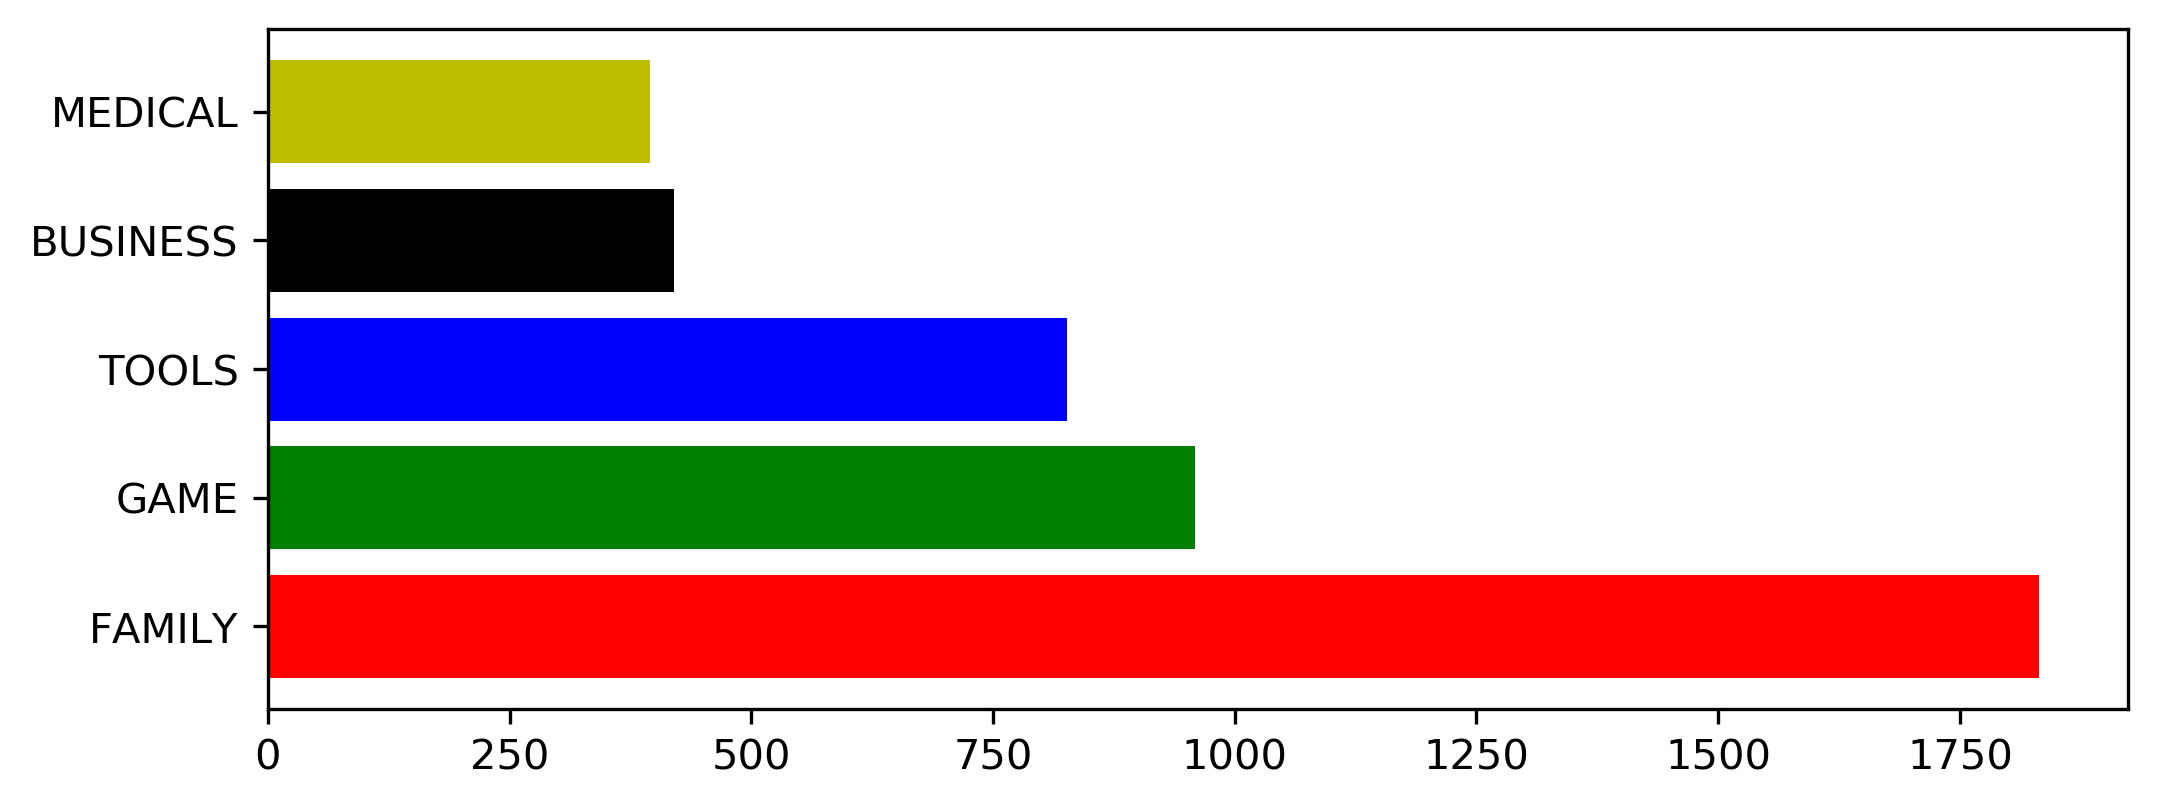

In [61]:
    fig = plt.figure(figsize=(8,3),dpi=300)
    fig.add_subplot()
    plt.barh(X,Y, color=my_colors)
    plt.savefig('cat_order.png',bbox_inches="tight") 
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())

In [62]:
result = str(figdata_png)[2:-1]

In [63]:
result

'iVBORw0KGgoAAAANSUhEUgAACWAAAAOECAYAAAAl6Aq0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAuIwAALiMBeKU/dgAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzde5TXdZ348dcMA4iMXNvxhgoJYgOrLZKAsEcEE80tkCETjGu7Zp1T1K6dWm0XpCzP5tbanuNGxTBcEmwNJlBYsUK8FRSYLiQUrFriIij35Drz/f3hz+/yZbjMvPnOfEd5PM6Zc3h/vp/P+/OamTh2Ds/z+RRlMplMAAAAAAAAAAAA0GDFhR4AAAAAAAAAAADg3UqABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAAAkEiABQAAAAAAAAA

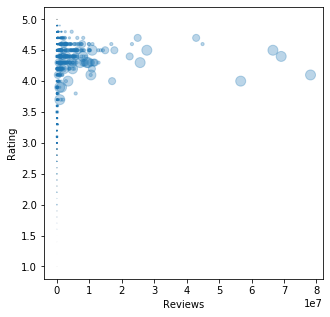

In [67]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())

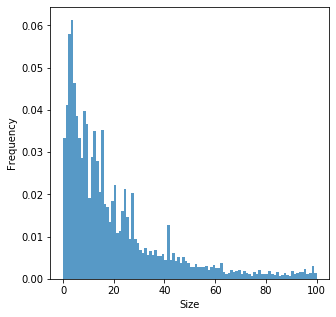

In [70]:
X=(df2['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())

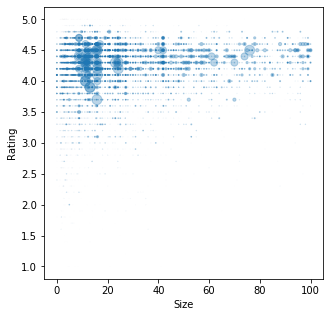

In [83]:
X = (df2['Size']/1000000).values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())